## 243 - What to do about NaNs?


[Youtube](https://www.youtube.com/watch?v=Vl8Ul3iTql0)

In [1]:
from siphon.simplewebservice.iastate import IAStateUpperAir
from datetime import datetime
from metpy.units import units, pandas_dataframe_to_unit_arrays
import metpy.interpolate as mpinterp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
station = 'OUN'
time = datetime(2022, 2, 2)
df = IAStateUpperAir.request_data(time, station)
df.head()

,pressure,height,temperature,dewpoint,direction,speed,station,time,u_wind,v_wind
0,968.0,362.0,16.2,10.2,90.0,5.0,KOUN,2022-02-02,-5.000000,-3.061617e-16
1,938.8,609.0,NaN,NaN,145.0,10.0,KOUN,2022-02-02,-5.735764,8.191520e+00
2,925.0,728.0,13.4,8.4,150.0,12.0,KOUN,2022-02-02,-6.000000,1.039230e+01
3,904.6,914.0,NaN,NaN,160.0,15.0,KOUN,2022-02-02,-5.130302,1.409539e+01
4,872.0,1219.0,NaN,NaN,165.0,17.0,KOUN,2022-02-02,-4.399924,1.642074e+01


In [3]:
df = pandas_dataframe_to_unit_arrays(df)
df

{'pressure': masked_array(data=[968. , 938.8, 925. , 904.6, 872. , 850. , 840.5, 819. ,
                    809.6, 779.6, 768. , 751. , 750.5, 730. , 726. , 722.3,
                    704. , 700. , 650. , 644.2, 632. , 616. , 602. , 595.9,
                    582. , 564. , 550.4, 528.8, 504. , 500. , 468.4, 455. ,
                    453. , 430. , 428. , 424. , 400. , 379.8, 372. , 334. ,
                    326. , 305.1, 300. , 297. , 291. , 269. , 252. , 250. ,
                    242.1, 241. , 224. , 217. , 209. , 200. , 180. , 150. ,
                    117.2, 101. , 100. ],
              mask=False,
        fill_value=1e+20) <Unit('hectopascal')>,
 'height': masked_array(data=[  362.,   609.,   728.,   914.,  1219.,  1432.,  1524.,
                     1735.,  1828.,  2133.,  2254.,  2433.,  2438.,  2658.,
                     2702.,  2743.,  2947.,  2999.,  3587.,  3657.,  3808.,
                     4009.,  4188.,  4267.,  4450.,  4691.,  4876.,  5181.,
                     5545

## Leave it

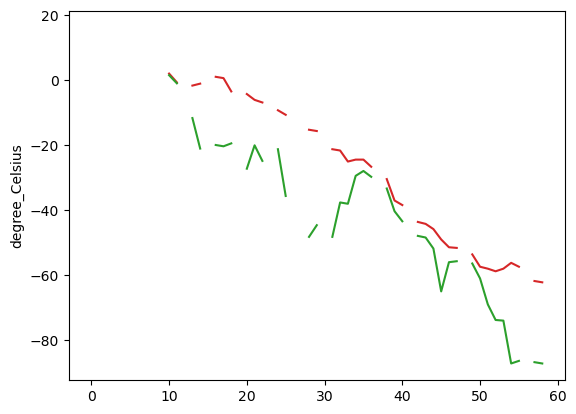

In [4]:
plt.plot(df['temperature'], color = 'tab:red')
plt.plot(df['dewpoint'], color = 'tab:green')

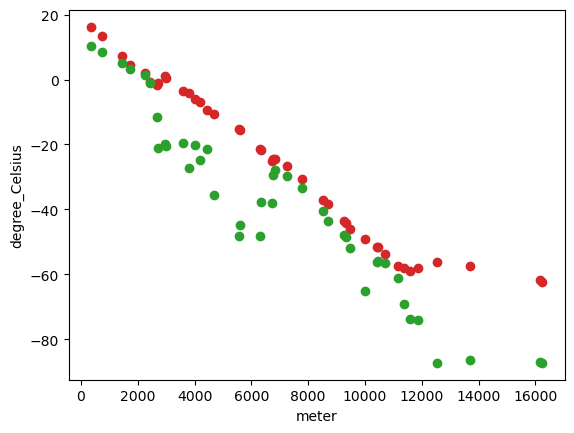

In [5]:
plt.scatter(df['height'], df['temperature'], color = 'tab:red')
plt.scatter(df['height'], df['dewpoint'], color = 'tab:green')

## Remove it

In [6]:
nan_idx = np.isnan(df['temperature']) | np.isnan(df['dewpoint'])

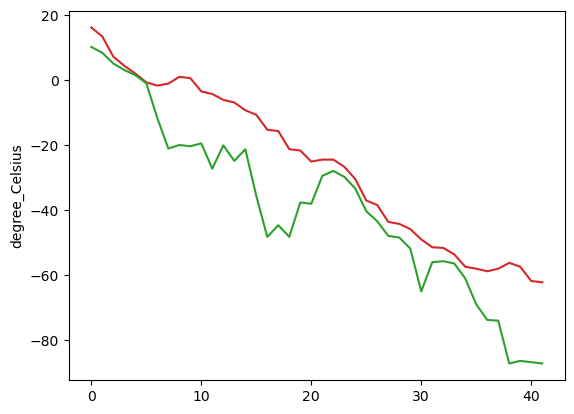

In [7]:
plt.plot(df['temperature'][~nan_idx], color = 'tab:red')
plt.plot(df['dewpoint'][~nan_idx], color = 'tab:green')

## Interpolate

In [8]:
t_interp = mpinterp.interpolate_nans_1d(df['height'], df['temperature'])
td_interp = mpinterp.interpolate_nans_1d(df['height'], df['dewpoint'])

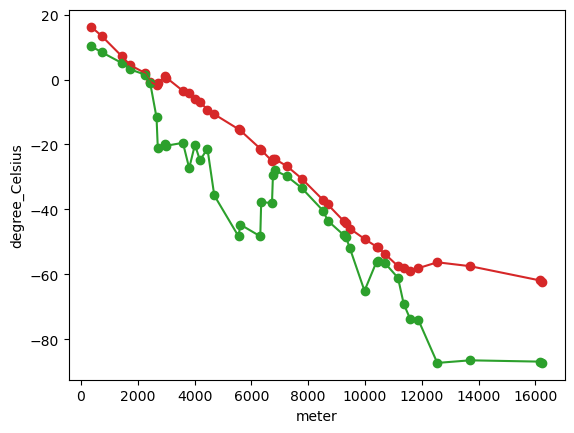

In [9]:
plt.plot(df['height'], t_interp, color = 'tab:red')
plt.plot(df['height'], td_interp, color = 'tab:green')
plt.scatter(df['height'], df['temperature'], color = 'tab:red')
plt.scatter(df['height'], df['dewpoint'], color = 'tab:green')

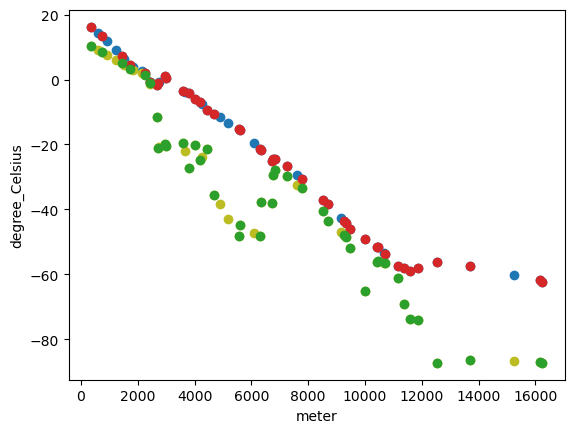

In [10]:
plt.scatter(df['height'], t_interp, color = 'tab:blue')
plt.scatter(df['height'], td_interp, color = 'tab:olive')
plt.scatter(df['height'], df['temperature'], color = 'tab:red')
plt.scatter(df['height'], df['dewpoint'], color = 'tab:green')

In [11]:
t_interp_p_lin = mpinterp.interpolate_nans_1d(df['pressure'].m, df['temperature'].m)
td_interp_p_lin = mpinterp.interpolate_nans_1d(df['pressure'].m, df['dewpoint'].m)

In [12]:
t_interp_p_log = mpinterp.interpolate_nans_1d(df['pressure'].m, df['temperature'].m, kind = 'log')
td_interp_p_log = mpinterp.interpolate_nans_1d(df['pressure'].m, df['dewpoint'].m, kind = 'log')

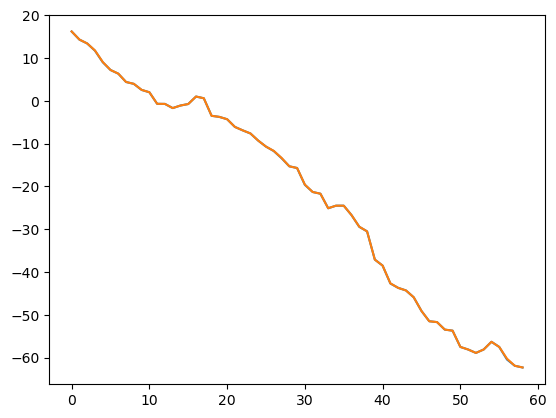

In [13]:
plt.plot(t_interp_p_lin)
plt.plot(t_interp_p_log)

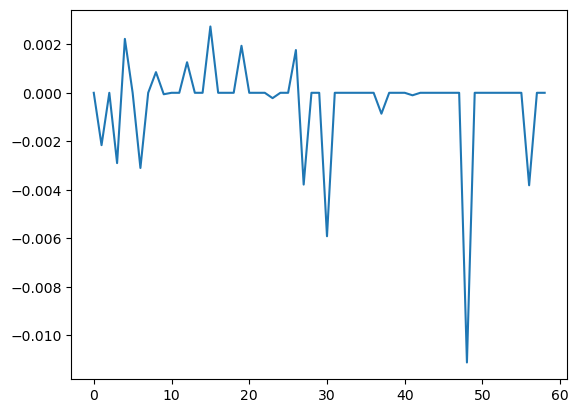

In [14]:
plt.plot(t_interp.m - t_interp_p_log)

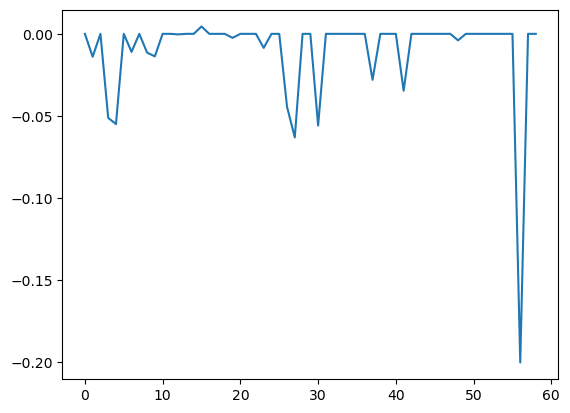

In [15]:
plt.plot(t_interp_p_lin - t_interp_p_log)

## Fill it

In [16]:
ds = pd.Series(df['temperature'])
ds = ds.fillna(method = 'bfill')

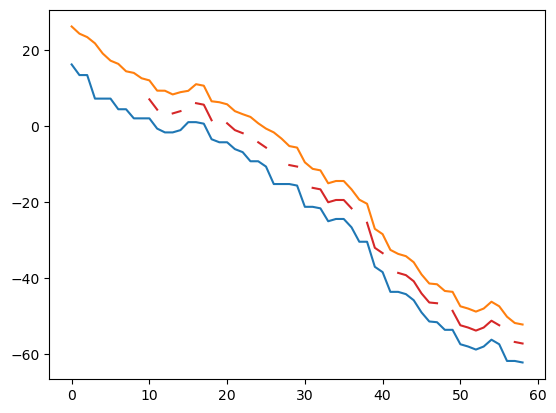

In [17]:
plt.plot(ds)
plt.plot(df['temperature'].m + 5, color = 'tab:red')
plt.plot(t_interp.m + 10, color = 'tab:orange')